In [3]:
import os,sys
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import numpy as np

In [4]:
from PIL import Image, ImageFilter

#Transfer image to 28X28 pixel matrix
def imageprepare(argv):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
    im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 4))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

In [5]:
os.chdir(r'c:\data_python\QC_test_cropped2\OK')

In [7]:
a = list()
for i in np.arange(1,9003,1):    
    a.append(imageprepare('OK('+str(i)+')_cropped.jpg'))

In [8]:
os.chdir(r'c:\data_python\QC_test_cropped2\NG')

In [9]:
for i in np.arange(1,9003,1):    
    a.append(imageprepare('NG('+str(i)+')_cropped.jpg'))

In [11]:
#Transfer column to row#
a_array = np.array([a])
#No transfer column to row#
a_array = np.array(a)

In [12]:
a_array = np.array(a)

In [13]:
a_array.shape

(18004, 784)

In [18]:
type(a_array)

numpy.ndarray

In [19]:
#Trasnfer Array to Dataframe#
a_df = pd.DataFrame(a_array)

In [22]:
#Create label column#
a_df['Label'] = 'NA'

In [24]:
#Labeling ok/ng on label column#
a_df.loc[0:9001,'Label'] = 'OK'
a_df.loc[9002:18003,'Label'] = 'NG'

In [26]:
#export dataframe into csv
os.chdir(r'c:\data_python\QC_test_cropped2')
np.savetxt("QC_test.csv", a_array, delimiter=",")

In [27]:
QC = pd.read_csv('QC_test.csv')

In [31]:
sys.path.append('C:\data_python\deep-learning-from-scratch-master\ch04')
from two_layer_net import TwoLayerNet

In [32]:
os.chdir(r'C:\data_python\QC_test_cropped2')

In [33]:
a_df_label = a_df.loc[: , 'Label']

In [37]:
a_df_label_array = np.array(a_df_label)

In [38]:
#transfer array to list#
a_df_label_list = list()
for i in np.arange(0,len(a_df_label_array),1):
    if a_df_label_array[i] == "NG":
        a_df_label_list.append(1)
    else:
        a_df_label_list.append(0)

In [41]:
#Array Separate 함수
def split(arr, size):
     arrs = []
     while len(arr) > size:
         pice = arr[:size]
         arrs.append(pice)
         arr   = arr[size:]
     arrs.append(arr)
     return arrs

In [43]:
a_df_label_split = split(a_df_label_list,1)
a_df_label_final = np.array(a_df_label_split)

In [51]:
a_df_data = a_df.iloc[ : , 0:784]
a_df_data_array = np.array(a_df_data)

In [52]:
# 트레이닝 & 테스트 데이터 셋 분할 (75%, 25%) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a_df_data_array, a_df_label_final, random_state=0)

In [54]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient

#define two layer neural network 
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

train acc, test acc | 1.0, 1.0
train acc, test acc | 0.4387913796934015, 0.45234392357253944
train acc, test acc | 0.3875435088498852, 0.38724727838258166
train acc, test acc | 0.40864992964526403, 0.4087980448789158
train acc, test acc | 0.3492557209508998, 0.3603643634747834
train acc, test acc | 0.14159816337110273, 0.13974672295045545
train acc, test acc | 0.11686291935125527, 0.11730726505221062
train acc, test acc | 0.31133822113604387, 0.3019329037991557
train acc, test acc | 0.8294453084499741, 0.8291490779826706
train acc, test acc | 0.0, 0.0
train acc, test acc | 0.623120787973043, 0.6134192401688514
train acc, test acc | 1.0, 1.0
train acc, test acc | 0.1565578019699326, 0.16240835369917797
train acc, test acc | 0.0, 0.0
train acc, test acc | 0.5287713841368584, 0.5214396800710953
train acc, test acc | 0.0, 0.0
train acc, test acc | 0.27756794786343775, 0.27682737169517885
train acc, test acc | 1.0, 1.0
train acc, test acc | 1.0, 1.0
train acc, test acc | 0.5518773605865364,

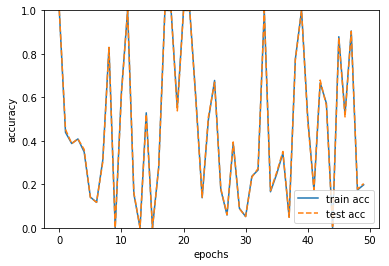

In [56]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=2)

iters_num = 5000  # 반복 횟수를 적절히 설정한다.
train_size = X_train.shape[0]
batch_size = 200   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = 100

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_train[batch_mask]
    t_batch = y_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, y_train)
        test_acc = network.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [64]:
#import sklearn library
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix

mlp = MLPClassifier(random_state=42, hidden_layer_sizes=[15,15],max_iter=1000,alpha=0.01)
#X,y = make_moons(n_samples=100, noise=0.25, random_state=3)

In [60]:
mlp.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[15, 15], learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [61]:
mlp.score(X_train,y_train)

0.9958527734577501

In [62]:
mlp.score(X_test,y_test)

0.9944456787380582

In [63]:
y_predict = np.array(mlp.predict(X_train))
y_predict_split = split(y_predict,1)
y_predict_array = np.array(y_predict_split)

In [66]:
confusion_matrix(y_train,y_predict_array, labels=[1,0])

array([[6706,   15],
       [  41, 6741]], dtype=int64)